In [404]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import utils.boxes as box_utils
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
import glob
import scipy.io as sio
import time
import pylab as pl
from IPython import display

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [426]:
dataDir='../lib/datasets/data/ucf101'
#dataDir='../lib/datasets/data/daly'

# get on ann file to get classes
annFile='../lib/datasets/data/ucf101/detection/instances_val1_ucf101_keyframes1.json'

detPath = '../'
vidName = 'v_Diving_g01_c01' # 'v_Diving_g06_c07' # 'v_BasketballDunk_g01_c01' # 'v_Diving_g01_c01'
det_th = 0.2

dets = glob.glob(detPath + '/'+ vidName + '/*.mat')
dets.sort()

coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


IndexError: list index out of range

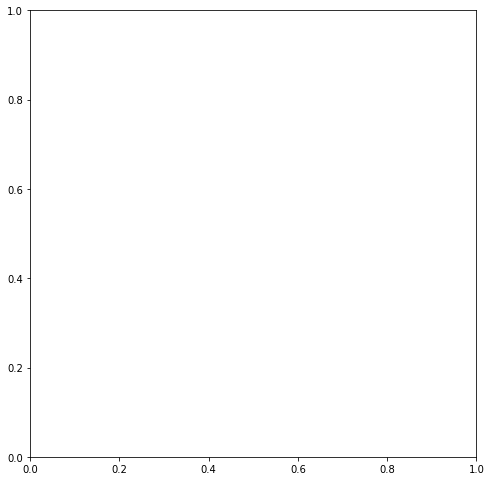

In [427]:
rndIdx = np.random.randint(0,len(dets))


fig, ax = plt.subplots()
for i in range(10000):
    ax.cla()
    rndIdx = i
    imname = '%s/image-%05d.jpg' % (vidName, rndIdx+1)
    det = sio.loadmat(dets[rndIdx])
    # load and display image
    I = io.imread(dataDir + '/images/'+ imname)


    # load and display instance annotations
    ax.imshow(I); plt.axis('off')

    polygons = []
    color = []
    ax.set_autoscale_on(False)
    for c, cat in enumerate(cats):
        if det['boxes_cell'].size == 0:
            continue
        cdet = det['boxes_cell'][0][c]
        for d in cdet:
            x1, y1, x2, y2, sc = d
            w = x2 - x1 + 1
            h = y2 - y1 + 1
            if sc > det_th:
                #print cat
                polygons.append(patches.Rectangle((x1,y1),w,h,linewidth=1,edgecolor='r',facecolor='none'))
                color.append((np.random.random((1, 3))*0.6+0.4).tolist()[0])
    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
    

    ax.add_collection(p);
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #display.clear_output(wait=False)
    #time.sleep(0.05)
    